   StudyHours  Attendance  Pass
1       11.67   41.666667     1
2        6.97   25.000000     1
3        2.88   25.000000     1
5        0.90    8.333333     1
6       20.50   16.666667     1
       StudyHours  Attendance       Pass
count   76.000000   76.000000  76.000000
mean    23.816184   76.535088   0.118421
std     15.367754   27.443900   0.325253
min      0.630000    0.000000   0.000000
25%     14.857500   64.583333   0.000000
50%     20.780000   83.333333   0.000000
75%     29.640000  100.000000   0.000000
max     82.320000  100.000000   1.000000


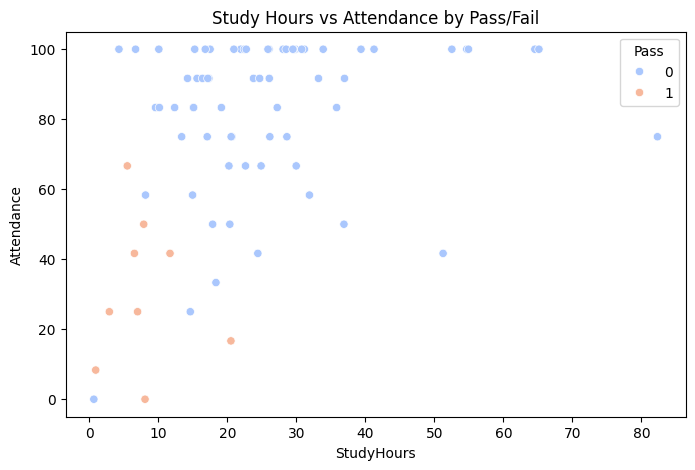

Model Accuracy: 0.88


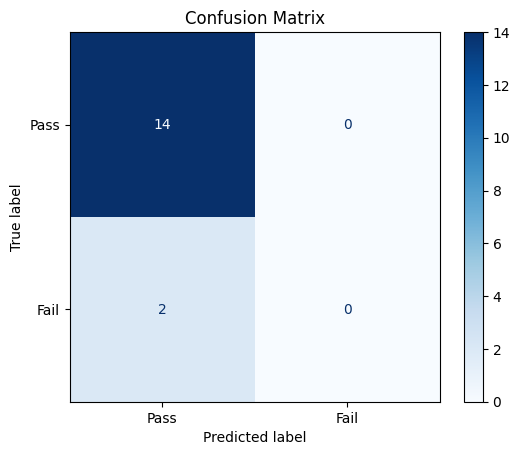

In [1]:
# Task 1: Student Pass/Fail Prediction
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load Dataset
df = pd.read_csv("C:/Users/NAVADEEP/OneDrive/Pictures/Documents/Main flow/Task 5/student pass-fail.csv")

# Select relevant columns and rename
df = df[["Total Hours in Module Area", "Percent Attended", "label (fail=1, pass=0)"]]
df.columns = ["StudyHours", "Attendance", "Pass"]
# Drop rows with missing values
df.dropna(inplace=True)
# Data Exploration
# First five rows of dataset
print(df.head())
# Check for outliers and distribution
print(df.describe())
# Drop rows with missing values
df.dropna(inplace=True)

# Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="StudyHours", y="Attendance", hue="Pass", palette="coolwarm")
plt.title("Study Hours vs Attendance by Pass/Fail")
plt.show()

# Model Training
# Features and target
X = df[["StudyHours", "Attendance"]]
y = df["Pass"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 8 Model Evaluation
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pass", "Fail"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [3]:
!pip install nltk

In [5]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Download necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# 2. Load Dataset
df = pd.read_csv("C:/Users/NAVADEEP/OneDrive/Pictures/Documents/Main flow/Task 5/reviews.csv") 
print(df.head())
df = df[["review", "sentiment"]]
df.dropna(inplace=True)

# 3. Preprocessing Function
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess)

# 4. Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])

# 5. Convert Target to Binary
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
y = df['sentiment']

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# 8. Model Evaluation
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Report:")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-Score  : {f1:.2f}")
print("\nDetailed Report:\n")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# 9. Insights – View Examples
df_test = df.iloc[y_test.index]
df_test = df_test.assign(Predicted=y_pred)

# Correct Predictions
correct = df_test[df_test['sentiment'] == df_test['Predicted']].head(3)

# Incorrect Predictions
incorrect = df_test[df_test['sentiment'] != df_test['Predicted']].head(3)

print("\nCorrectly Classified Examples:")
for i, row in correct.iterrows():
    print(f"\nReview: {row['review']}\nPredicted Sentiment: {row['Predicted']}")

print("\nIncorrectly Classified Examples:")
for i, row in incorrect.iterrows():
    print(f"\nReview: {row['review']}\nActual Sentiment: {row['sentiment']} | Predicted: {row['Predicted']}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAVADEEP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAVADEEP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAVADEEP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Model Evaluation Report:
Accuracy  : 0.88
Precision : 0.88
Recall    : 0.90
F1-Score  : 0.89

Detailed Report:

              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      4961
    Positive       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


Correctly Classified Examples:

Review: Not many television shows appeal to quite as many different kinds of fans like Farscape does...I know youngsters and 30/40+ years old;fans bot